# Simple notebook to look up data for PNG and load for AOI
code borrowed from https://github.com/csiro-easi/eocsi-hackathon-2022/blob/main/01-welcome-to-easi.ipynb

In [1]:
# Formatting for basic plots
%matplotlib inline
import matplotlib.pyplot as plt

# Formatting pandas table output
import pandas
pandas.set_option("display.max_rows", None)

# Datacube
import datacube
from datacube.utils import masking  # https://github.com/opendatacube/datacube-core/blob/develop/datacube/utils/masking.py
from odc.algo import enum_to_bool   # https://github.com/opendatacube/odc-tools/blob/develop/libs/algo/odc/algo/_masking.py
from datacube.utils.rio import configure_s3_access
dc = datacube.Datacube()

# Notebook helper tools (in dea_tools)
import sys
sys.path.insert(1, "/home/jovyan/code/dea-notebooks/Tools")

from dea_tools.plotting import rgb, display_map, map_shapefile

#### AWS access

In [2]:
## Optional: Access AWS "requester-pays" buckets
# This is necessary for Landsat ("landsatN_c2l2_*") and Sentinel-2 ("s2_l2a") products
from datacube.utils.aws import configure_s3_access
configure_s3_access(aws_unsigned=False, requester_pays=True);

#### list products and measurements

In [3]:
# list products - https://explorer.asia.easi-eo.solutions/products
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
copernicus_dem_30,copernicus_dem_30,Copernicus 30m Digital Elevation Model (GLO-30),None,EPSG:4326,"(-0.00027777777777778, 0.00027777777777778)"
landsat5_c2l2_sr,landsat5_c2l2_sr,Landsat 5 Collection 2 Level-2 Surface Reflect...,None,None,None
landsat5_c2l2_st,landsat5_c2l2_st,Landsat 5 Collection 2 Level-2 UTM Surface Tem...,CC-BY-4.0,None,None
landsat7_c2l2_sr,landsat7_c2l2_sr,Landsat 7 USGS Collection 2 Surface Reflectanc...,None,None,None
landsat7_c2l2_st,landsat7_c2l2_st,Landsat 7 Collection 2 Level-2 UTM Surface Tem...,CC-BY-4.0,None,None
landsat8_c2l1,landsat8_c2l1,Landsat 8 Collection 2 Level-1 (top of atmosph...,CC-BY-4.0,None,None
landsat8_c2l2_sr,landsat8_c2l2_sr,"Landsat 8 Collection 2 Surface Reflectance, pr...",None,None,None
landsat8_c2l2_st,landsat8_c2l2_st,Landsat 8 Collection 2 Level-2 UTM Surface Tem...,CC-BY-4.0,None,None
landsat9_c2l1,landsat9_c2l1,Landsat 9 Collection 2 Level-1 (top of atmosph...,CC-BY-4.0,None,None


In [4]:
# list measurements of a product
measurements = dc.list_measurements()
measurements.loc['landsat8_c2l2_sr']

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
coastal,coastal,uint16,reflectance,0,"[SR_B1, band_1, B1, coastal_aerosol]",NaN
blue,blue,uint16,reflectance,0,"[SR_B2, band_2, B2]",NaN
green,green,uint16,reflectance,0,"[SR_B3, band_3, B3]",NaN
red,red,uint16,reflectance,0,"[SR_B4, band_4, B4]",NaN
nir08,nir08,uint16,reflectance,0,"[SR_B5, band_5, B5, nir]",NaN
swir16,swir16,uint16,reflectance,0,"[SR_B6, band_6, B6, swir1]",NaN
swir22,swir22,uint16,reflectance,0,"[SR_B7, band_7, B7, swir2]",NaN
qa_pixel,qa_pixel,uint16,bit_index,1,"[pixel_quality, level2_qa, QA_PIXEL, pixel_qa]","{'snow': {'bits': 5, 'values': {'0': 'not_high..."
qa_aerosol,qa_aerosol,uint8,bit_index,1,"[sr_aerosol, SR_QA_AEROSOL, aerosol_qa]","{'water': {'bits': 2, 'values': {'0': 'not_wat..."


#### display AOI

In [5]:
latitude = (-7.3, -7.4)
longitude = (144.4, 144.5)
display_map(longitude, latitude)

#### load data

In [6]:
# load data
data = dc.load(
    product = 'landsat8_c2l2_sr', 
    latitude = latitude,
    longitude = longitude,
    time=('2018-01-01', '2018-06-01'),
    
    output_crs="EPSG:32755",  # Target CRS - https://epsg.io/?q=Papua%20New%20Guinea%20kind%3APROJCRS
    resolution=(30, -30),     # Target resolution
    group_by='solar_day',     # Group by time method
    # dask_chunks={'time': 1}
)
data

<xarray.Dataset>
Dimensions:      (time: 8, y: 372, x: 371)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-03T00:32:18.090300 ... 2018-05...
  * y            (y) float64 9.181e+06 9.181e+06 ... 9.192e+06 9.192e+06
  * x            (x) float64 2.24e+05 2.24e+05 2.24e+05 ... 2.13e+05 2.129e+05
    spatial_ref  int32 32755
Data variables:
    coastal      (time, y, x) uint16 7874 7901 7863 7837 ... 7600 7500 7780 7984
    blue         (time, y, x) uint16 8058 8064 7987 7984 ... 7635 7524 7791 7937
    green        (time, y, x) uint16 8891 8973 8850 8876 ... 8521 8056 8603 8974
    red          (time, y, x) uint16 8475 8585 8453 8430 ... 7766 7552 7810 7977
    nir08        (time, y, x) uint16 18111 17618 17849 ... 14172 19496 21938
    swir16       (time, y, x) uint16 10550 10612 10607 ... 9254 11391 12532
    swir22       (time, y, x) uint16 8388 8441 8406 8470 ... 8173 7896 8628 8965
    qa_pixel     (time, y, x) uint16 21824 21824 21824 ... 23888 23888 21824
    qa_aerosol   (time, y, x) uint8 96 96 66 96 96 66 96 ... 96 96 96 96 96 96
    qa_radsat    (time, y, x) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:32755
    grid_mapping:  spatial_ref

#### scale data (required for col 2 landsat) and mask cloudy data
https://www.usgs.gov/faqs/how-do-i-use-scale-factor-landsat-level-2-science-products

In [7]:
# Choose bands for further processing
# bands = ['red', 'green', 'blue', 'nir08', 'swir22']

# Make a mask array for the nodata value
valid_mask = masking.valid_data_mask(data)

# Define the scaling values (landsat8_c2l2_sr)
scale_factor = 0.0000275
add_offset = -0.2

# Make a scaled data array
scaled_data = data * scale_factor + add_offset

In [8]:
# Make a cloud mask (landsat8_c2l2_sr)

## Optional - Show the flag_definition information
## See also http://explorer.asia.easi-eo.solutions/products/landsat8_c2l2_sr#definition-doc
# display( masking.describe_variable_flags(data.qa_pixel) )

# Multiple flags are combined as logical AND (bitwise)
cloud_mask = masking.make_mask(data['qa_pixel'], 
    clear='clear',
)
# Apply each of the masks
filtered_data = scaled_data.where(valid_mask & cloud_mask)

#### plot data

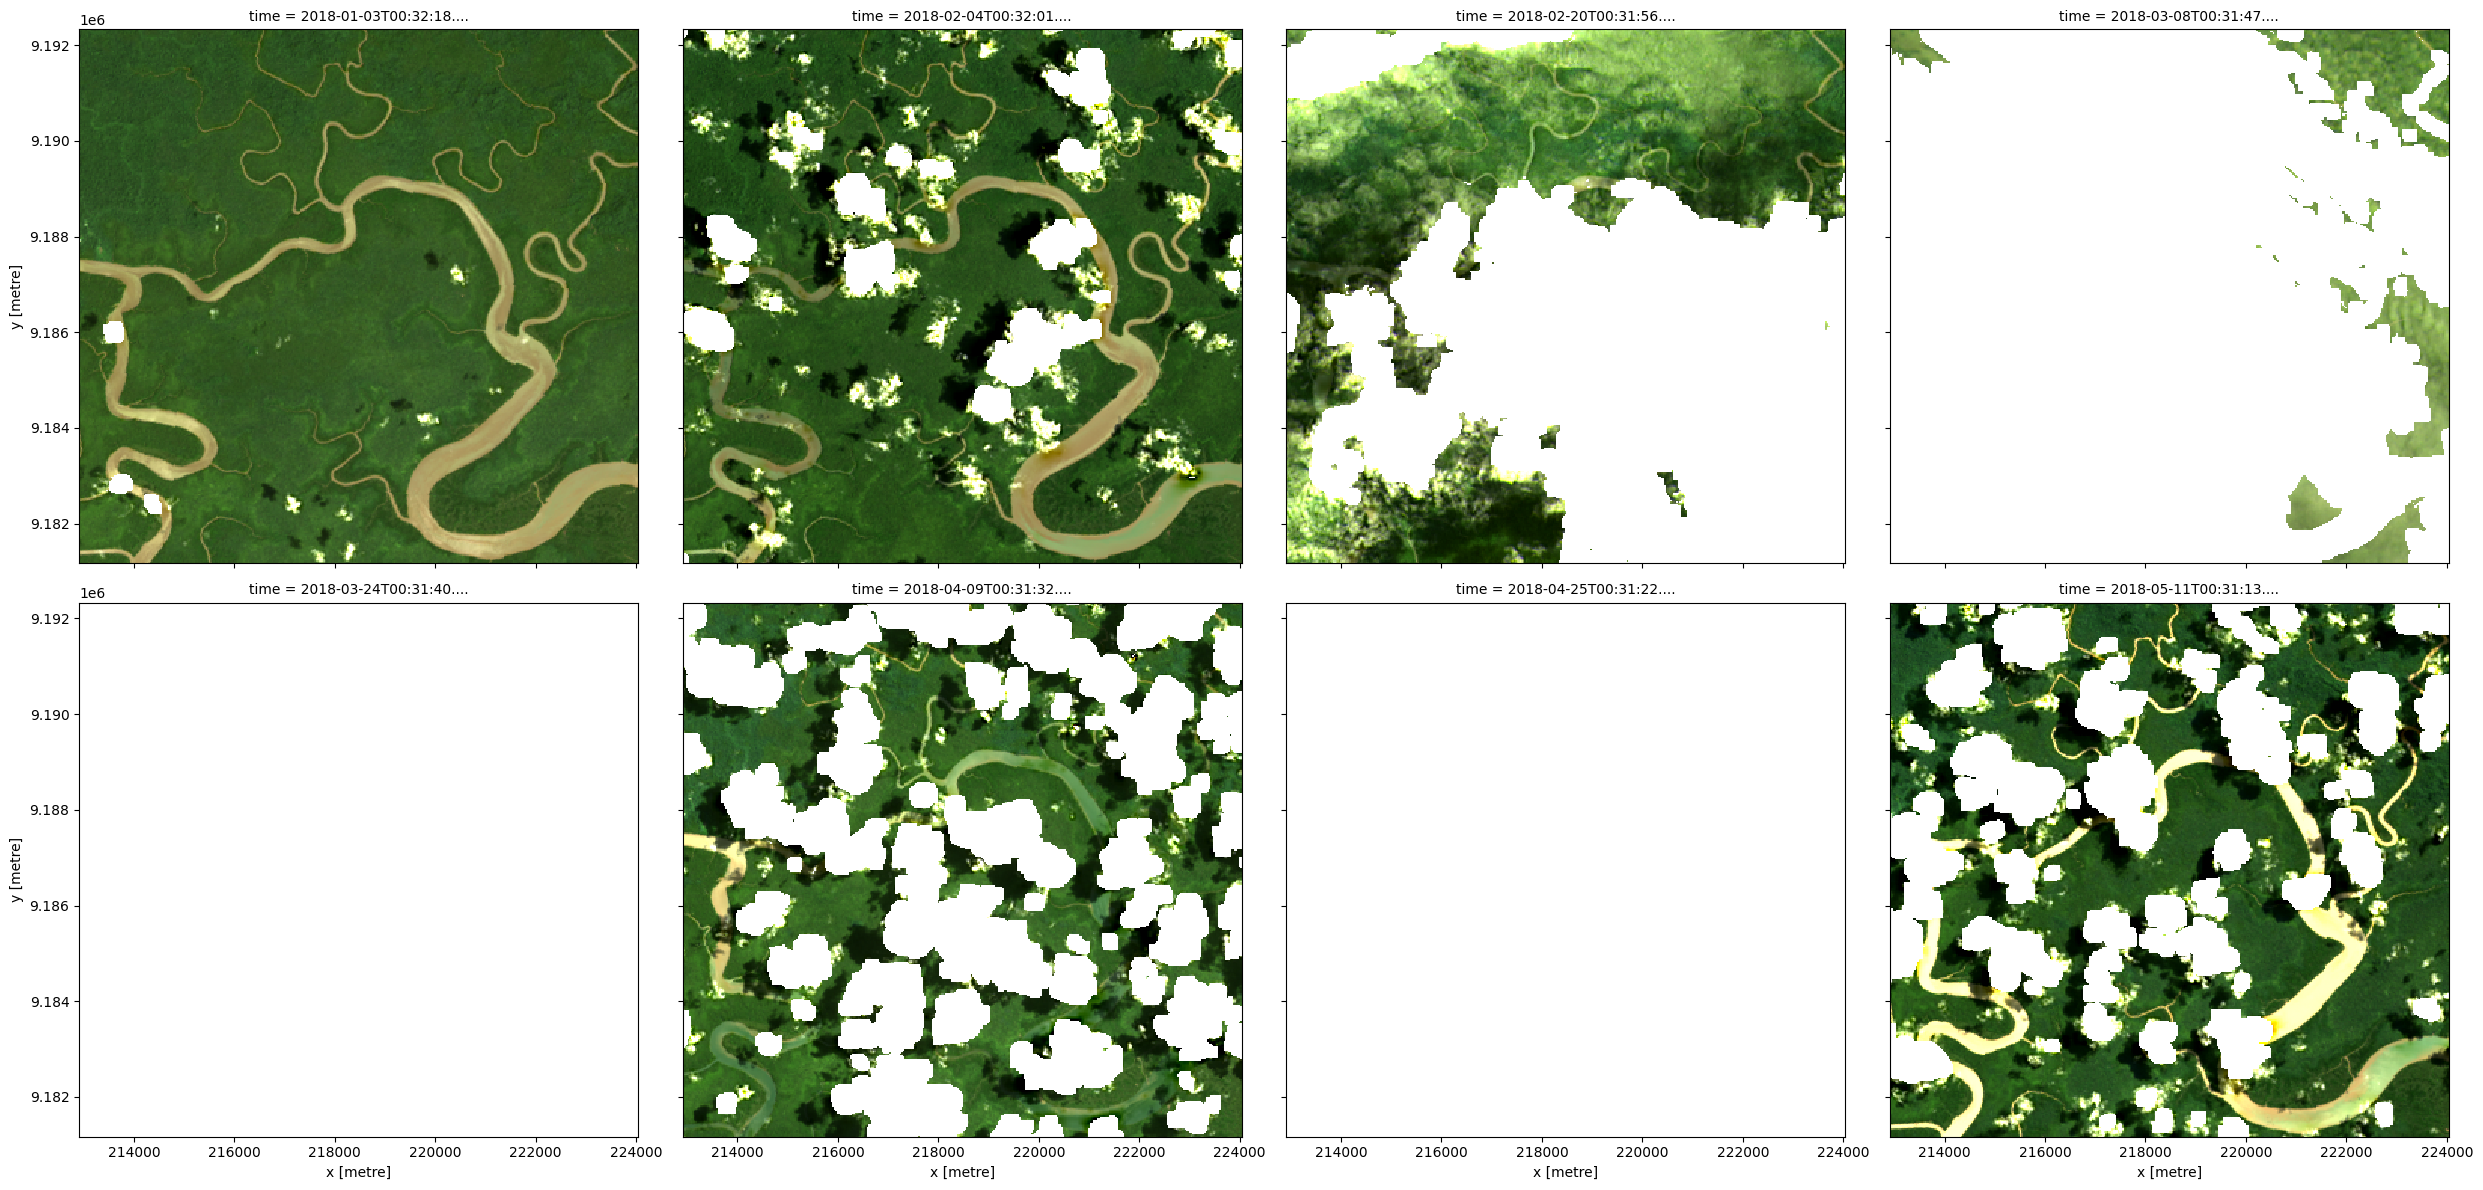

In [9]:
rgb(filtered_data, ['red', 'green', 'blue'], col="time", robust=True, col_wrap=4)

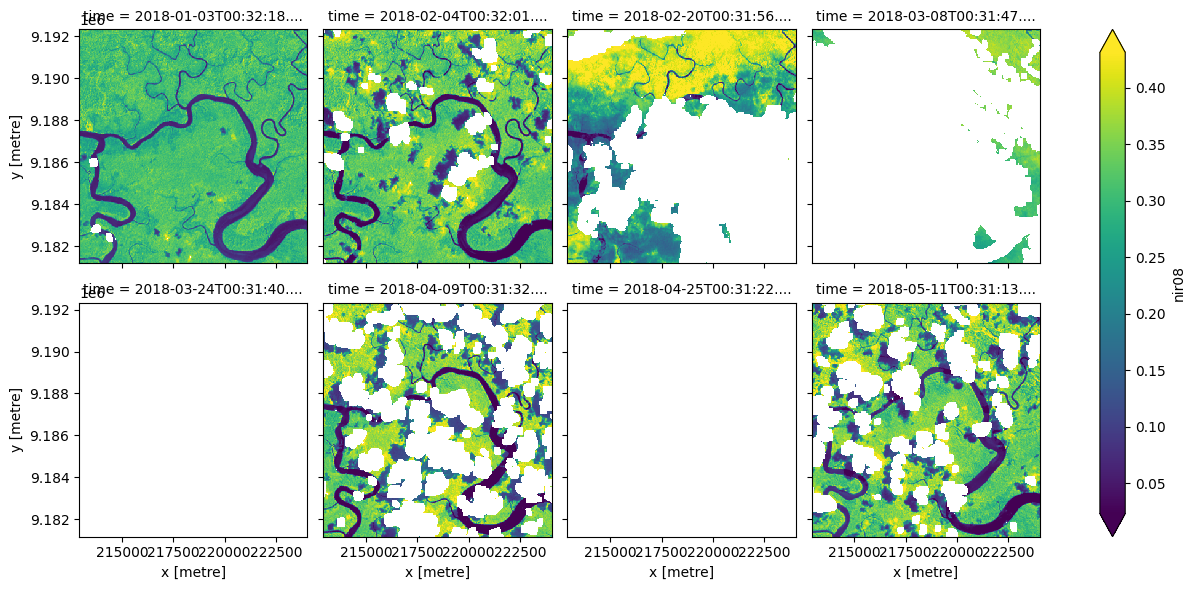

In [10]:
filtered_data['nir08'].plot(col="time", robust=True, col_wrap=4)